# 1. Imports modules and necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import feather
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from utility_func.utility import *
from pandas_summary import DataFrameSummary
from sklearn import metrics as met
import joblib

In [2]:
np.random.seed(42)
np.set_printoptions(suppress=True)
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 20
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('input/data/raw_data.csv') # Reading the Dataset

# 2. Data Analysis

In [4]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.20,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.80,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.80,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.80,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.40,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.10,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.00,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.10,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.90,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.20,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
# rename the catagory column 
df.rename(columns={'classification' : 'class'}, inplace=True)

In [7]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [8]:
df.drop('id', axis=1, inplace=True)

In [9]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

### 2.1 Data Preprocessing :Finding and Removing Anomalies

In [10]:
# Function to find the categorical and numerical features
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='O']
    num_col=[col for col in df.columns if df[col].dtype!='O']
    return cat_col,num_col  

In [11]:
cat_col,num_col=extract_cat_num(df)
cat_col

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'class']

In [12]:
num_col

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [13]:
# dirtiness in data

for col in cat_col:
    print('{} has {} values'.format(col,df[col].unique()))
    print("\n")

rbc has [nan 'normal' 'abnormal'] values


pc has ['normal' 'abnormal' nan] values


pcc has ['notpresent' 'present' nan] values


ba has ['notpresent' 'present' nan] values


pcv has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values


wc has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'

In [14]:
# Convert the object string  features into float
for col in ['pcv','wc','rc']:
    df[col] = df[col].str.extract('(\d+\.\d+|\d+)').astype(float)

In [15]:
# Remove the tab in the categorical variables 
df['cad'].replace(to_replace={'\tno':'no'}, inplace=True)
df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'}, inplace=True)
df['class'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

### 2.2 Save the preprocessed data

In [16]:
os.makedirs('./input/processed/', exist_ok=True)
df.to_feather('./input/processed/ckd-processed')

In [17]:
df = feather.read_dataframe('input/processed/ckd-processed')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,None,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,None,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [18]:
for cols in ['sg', 'al', 'su']:
    df[cols] = df[cols].astype('category')

In [19]:
#Change columns of strings in dataframe to a column of categorical values
train_cats(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     391 non-null    float64 
 1   bp      388 non-null    float64 
 2   sg      353 non-null    category
 3   al      354 non-null    category
 4   su      351 non-null    category
 5   rbc     248 non-null    category
 6   pc      335 non-null    category
 7   pcc     396 non-null    category
 8   ba      396 non-null    category
 9   bgr     356 non-null    float64 
 10  bu      381 non-null    float64 
 11  sc      383 non-null    float64 
 12  sod     313 non-null    float64 
 13  pot     312 non-null    float64 
 14  hemo    348 non-null    float64 
 15  pcv     329 non-null    float64 
 16  wc      294 non-null    float64 
 17  rc      269 non-null    float64 
 18  htn     398 non-null    category
 19  dm      398 non-null    category
 20  cad     398 non-null    category
 21  appet   399 non-

In [20]:
df['class'].cat.categories

Index(['ckd', 'notckd'], dtype='object')

In [21]:
# collect the categorical varibales in dictionary 
for cols in df.columns:
    if df[cols].dtype.name == 'category':
        print(cols, dict(enumerate(df[cols].cat.categories)) )

sg {0: 1.005, 1: 1.01, 2: 1.015, 3: 1.02, 4: 1.025}
al {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0}
su {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0}
rbc {0: 'abnormal', 1: 'normal'}
pc {0: 'abnormal', 1: 'normal'}
pcc {0: 'notpresent', 1: 'present'}
ba {0: 'notpresent', 1: 'present'}
htn {0: 'no', 1: 'yes'}
dm {0: 'no', 1: 'yes'}
cad {0: 'no', 1: 'yes'}
appet {0: 'good', 1: 'poor'}
pe {0: 'no', 1: 'yes'}
ane {0: 'no', 1: 'yes'}
class {0: 'ckd', 1: 'notckd'}


In [22]:
# convert the appet and class categories for 1 for good/positive and 0 for poor/ negative to make constitent 
df['appet'].cat.set_categories(['poor', 'good'], ordered=True, inplace=True)
df['class'].cat.set_categories(['notckd', 'ckd'], ordered=True, inplace=True)

In [23]:
for cols in df.columns:
    if df[cols].dtype.name == 'category':
        print(cols, dict(enumerate(df[cols].cat.categories)) )

sg {0: 1.005, 1: 1.01, 2: 1.015, 3: 1.02, 4: 1.025}
al {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0}
su {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0}
rbc {0: 'abnormal', 1: 'normal'}
pc {0: 'abnormal', 1: 'normal'}
pcc {0: 'notpresent', 1: 'present'}
ba {0: 'notpresent', 1: 'present'}
htn {0: 'no', 1: 'yes'}
dm {0: 'no', 1: 'yes'}
cad {0: 'no', 1: 'yes'}
appet {0: 'poor', 1: 'good'}
pe {0: 'no', 1: 'yes'}
ane {0: 'no', 1: 'yes'}
class {0: 'notckd', 1: 'ckd'}


In [24]:
# Save the semi processed data 
df.to_feather('./input/processed/ckd_semi_processed')


# 3. Creating Feature Variable and Target Variable

In [25]:
df = feather.read_dataframe('input/processed/ckd_semi_processed')
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.20,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.80,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.80,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.80,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.40,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.10,142.0,3.2,12.2,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.00,104.0,4.0,12.4,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.10,NaN,NaN,12.4,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.90,NaN,NaN,10.8,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.20,114.0,3.7,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


In [26]:
for cols in df.columns:
    if df[cols].dtype.name == 'category':
        print(cols, dict(enumerate(df[cols].cat.categories)) )

sg {0: 1.005, 1: 1.01, 2: 1.015, 3: 1.02, 4: 1.025}
al {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0}
su {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0}
rbc {0: 'abnormal', 1: 'normal'}
pc {0: 'abnormal', 1: 'normal'}
pcc {0: 'notpresent', 1: 'present'}
ba {0: 'notpresent', 1: 'present'}
htn {0: 'no', 1: 'yes'}
dm {0: 'no', 1: 'yes'}
cad {0: 'no', 1: 'yes'}
appet {0: 'poor', 1: 'good'}
pe {0: 'no', 1: 'yes'}
ane {0: 'no', 1: 'yes'}
class {0: 'notckd', 1: 'ckd'}


In [27]:
# splits off the response variable, and replaced NAN by the median value of the column.
features, response, nas = proc_df(df, 'class')

In [28]:
features.shape, response.shape

((400, 35), (400,))

In [29]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      400 non-null    float64
 1   bp       400 non-null    float64
 2   sg       400 non-null    int8   
 3   al       400 non-null    int8   
 4   su       400 non-null    int8   
 5   rbc      400 non-null    int8   
 6   pc       400 non-null    int8   
 7   pcc      400 non-null    int8   
 8   ba       400 non-null    int8   
 9   bgr      400 non-null    float64
 10  bu       400 non-null    float64
 11  sc       400 non-null    float64
 12  sod      400 non-null    float64
 13  pot      400 non-null    float64
 14  hemo     400 non-null    float64
 15  pcv      400 non-null    float64
 16  wc       400 non-null    float64
 17  rc       400 non-null    float64
 18  htn      400 non-null    int8   
 19  dm       400 non-null    int8   
 20  cad      400 non-null    int8   
 21  appet    400 non

In [30]:
nas

{'age': 55.0,
 'bp': 80.0,
 'bgr': 121.0,
 'bu': 42.0,
 'sc': 1.3,
 'sod': 138.0,
 'pot': 4.4,
 'hemo': 12.649999999999999,
 'pcv': 40.0,
 'wc': 8000.0,
 'rc': 4.8}

In [31]:
cols = features.columns
cols

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'age_na', 'bp_na', 'bgr_na', 'bu_na', 'sc_na',
       'sod_na', 'pot_na', 'hemo_na', 'pcv_na', 'wc_na', 'rc_na'],
      dtype='object')

### 3.1 Feature Scaling

In [32]:

scaler = MinMaxScaler()

In [33]:
x_features = scaler.fit_transform(features)

In [34]:
x_features_scaled = pd.DataFrame(x_features, columns=cols)
x_features_scaled.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,age_na,bp_na,bgr_na,bu_na,sc_na,sod_na,pot_na,hemo_na,pcv_na,wc_na,rc_na
0,0.522727,0.230769,0.8,0.333333,0.166667,0.0,1.0,0.5,0.5,0.211538,0.088575,0.010582,0.842271,0.042697,0.836735,0.777778,0.231405,0.525424,1.0,1.0,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.056818,0.000000,0.8,0.833333,0.166667,0.0,1.0,0.5,0.5,0.211538,0.042362,0.005291,0.842271,0.042697,0.557823,0.644444,0.157025,0.457627,0.5,0.5,0.5,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.681818,0.230769,0.4,0.500000,0.666667,1.0,1.0,0.5,0.5,0.856838,0.132221,0.018519,0.842271,0.042697,0.442177,0.488889,0.219008,0.457627,0.5,1.0,0.5,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.522727,0.153846,0.2,0.833333,0.166667,1.0,0.5,1.0,0.5,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085,1.0,0.5,0.5,0.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.556818,0.230769,0.4,0.500000,0.166667,1.0,1.0,0.5,0.5,0.179487,0.062901,0.013228,0.842271,0.042697,0.578231,0.577778,0.210744,0.423729,0.5,0.5,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


### 3.2 Creating Training set and Test set

In [35]:

x_train, x_test, y_train, y_test = train_test_split(x_features_scaled, response, test_size=0.25, stratify=response, random_state=42)

In [36]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((300, 35), (300,), (100, 35), (100,))

In [37]:
x_train.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,age_na,bp_na,bgr_na,bu_na,sc_na,sod_na,pot_na,hemo_na,pcv_na,wc_na,rc_na
67,0.488636,0.230769,0.8,0.666667,0.166667,1.0,0.5,0.5,0.5,0.861111,0.103979,0.011905,0.842271,0.042697,0.649660,0.688889,0.239669,0.457627,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
180,0.806818,0.307692,0.4,0.333333,0.833333,0.5,0.5,1.0,0.5,0.452991,0.139923,0.019841,0.842271,0.042697,0.489796,0.422222,0.239669,0.457627,0.5,1.0,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
234,0.397727,0.384615,0.4,0.166667,0.166667,0.5,1.0,0.5,0.5,0.211538,0.044929,0.011905,0.842271,0.042697,0.809524,0.777778,0.078512,0.525424,1.0,0.5,0.5,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
243,0.681818,0.307692,0.8,0.500000,0.333333,0.0,1.0,0.5,0.5,0.314103,0.119384,0.026455,0.842271,0.008989,0.700680,0.844444,0.363636,0.677966,1.0,0.5,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.659091,0.076923,0.4,0.666667,0.333333,1.0,0.5,1.0,0.5,0.568376,0.088575,0.017196,0.791798,0.011236,0.326531,0.355556,0.537190,0.152542,1.0,0.5,0.5,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
x_test.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,age_na,bp_na,bgr_na,bu_na,sc_na,sod_na,pot_na,hemo_na,pcv_na,wc_na,rc_na
70,0.670455,0.230769,0.6,0.166667,0.833333,0.0,1.0,0.5,0.5,0.722222,0.044929,0.003968,0.835962,0.042697,0.823129,0.777778,0.252066,0.525424,1.0,1.0,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.761364,0.230769,0.8,0.666667,0.166667,0.5,1.0,0.5,0.5,0.211538,0.260591,0.048942,0.804416,0.076404,0.639456,0.688889,0.239669,0.457627,1.0,0.5,0.5,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
27,0.761364,0.153846,0.4,0.666667,0.833333,1.0,0.5,0.5,0.5,0.517094,0.219512,0.030423,0.791798,0.033708,0.639456,0.622222,0.305785,0.338983,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
395,0.602273,0.230769,0.8,0.166667,0.166667,1.0,1.0,0.5,0.5,0.252137,0.121951,0.001323,0.917981,0.053933,0.857143,0.844444,0.185950,0.474576,0.5,0.5,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.772727,0.153846,0.6,0.500000,0.000000,0.0,0.0,0.5,0.5,0.211538,0.114249,0.014550,0.842271,0.042697,0.462585,0.688889,0.239669,0.457627,0.5,1.0,0.5,0.5,1.0,0.5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [39]:
y_train

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0], d

In [40]:
y_test

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int8)

In [41]:
# Remove the augmented features during impuatation 
x_train.drop(x_train.iloc[:,24:], axis=1, inplace=True)
x_test.drop(x_test.iloc[:,24:], axis=1, inplace=True)

In [42]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((300, 24), (300,), (100, 24), (100,))

In [43]:
x_train.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
67,0.488636,0.230769,0.8,0.666667,0.166667,1.0,0.5,0.5,0.5,0.861111,0.103979,0.011905,0.842271,0.042697,0.649660,0.688889,0.239669,0.457627,0.5,0.5,0.5,0.5,0.5,0.5
180,0.806818,0.307692,0.4,0.333333,0.833333,0.5,0.5,1.0,0.5,0.452991,0.139923,0.019841,0.842271,0.042697,0.489796,0.422222,0.239669,0.457627,0.5,1.0,0.5,1.0,0.5,0.5
234,0.397727,0.384615,0.4,0.166667,0.166667,0.5,1.0,0.5,0.5,0.211538,0.044929,0.011905,0.842271,0.042697,0.809524,0.777778,0.078512,0.525424,1.0,0.5,0.5,1.0,0.5,0.5
243,0.681818,0.307692,0.8,0.500000,0.333333,0.0,1.0,0.5,0.5,0.314103,0.119384,0.026455,0.842271,0.008989,0.700680,0.844444,0.363636,0.677966,1.0,0.5,0.5,1.0,0.5,0.5
147,0.659091,0.076923,0.4,0.666667,0.333333,1.0,0.5,1.0,0.5,0.568376,0.088575,0.017196,0.791798,0.011236,0.326531,0.355556,0.537190,0.152542,1.0,0.5,0.5,0.5,0.5,1.0


In [44]:
x_test.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
70,0.670455,0.230769,0.6,0.166667,0.833333,0.0,1.0,0.5,0.5,0.722222,0.044929,0.003968,0.835962,0.042697,0.823129,0.777778,0.252066,0.525424,1.0,1.0,0.5,1.0,0.5,0.5
38,0.761364,0.230769,0.8,0.666667,0.166667,0.5,1.0,0.5,0.5,0.211538,0.260591,0.048942,0.804416,0.076404,0.639456,0.688889,0.239669,0.457627,1.0,0.5,0.5,1.0,0.5,0.5
27,0.761364,0.153846,0.4,0.666667,0.833333,1.0,0.5,0.5,0.5,0.517094,0.219512,0.030423,0.791798,0.033708,0.639456,0.622222,0.305785,0.338983,1.0,1.0,1.0,1.0,1.0,0.5
395,0.602273,0.230769,0.8,0.166667,0.166667,1.0,1.0,0.5,0.5,0.252137,0.121951,0.001323,0.917981,0.053933,0.857143,0.844444,0.185950,0.474576,0.5,0.5,0.5,1.0,0.5,0.5
85,0.772727,0.153846,0.6,0.500000,0.000000,0.0,0.0,0.5,0.5,0.211538,0.114249,0.014550,0.842271,0.042697,0.462585,0.688889,0.239669,0.457627,0.5,1.0,0.5,0.5,1.0,0.5


# 4. Model Building

In [45]:
score = []
model = []

In [46]:

# utility function to print cross k-fold cross validation scores, their mean and variance(standard deviation)
def print_scores(model, x_train, y_train, cv, scoring):
    print('Cross validation scores:', cross_val_score(model, x_train.values, y_train, cv=cv, scoring=scoring, n_jobs=-1) )
    print( 'Mean_scores:', np.mean( cross_val_score(model, x_train.values, y_train, cv=cv, scoring=scoring, n_jobs=-1) ) )
    print( 'Variance:', np.std( cross_val_score(model, x_train.values, y_train, cv=cv, scoring=scoring, n_jobs=-1) ) )
    

### 4.1 Random Forest  Classifier

In [47]:
random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
print_scores(random_forest, x_train, y_train, 5, 'accuracy')

Cross validation scores: [1.         0.98333333 0.98333333 1.         1.        ]
Mean_scores: 0.9933333333333334
Variance: 0.008164965809277286


In [48]:
random_forest.fit(x_train.values, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [49]:
random_forest_preds = random_forest.predict(x_test.values)

In [50]:
random_forest_score = met.accuracy_score(y_test, random_forest_preds) * 100
score.append(random_forest_score)
model.append('Random Forest Classifier')

In [51]:
print('Random Forest Classifier Accuracy = ', random_forest_score )

Random Forest Classifier Accuracy =  100.0


In [52]:
cf_matrix = confusion_matrix(y_test, random_forest_preds)

print('Condusion Matrix:',cf_matrix)

Condusion Matrix: [[38  0]
 [ 0 62]]


In [53]:
#Utility function for plotting confusion matrix

def plot_cm(y_true, y_pred):
    cm = met.confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()

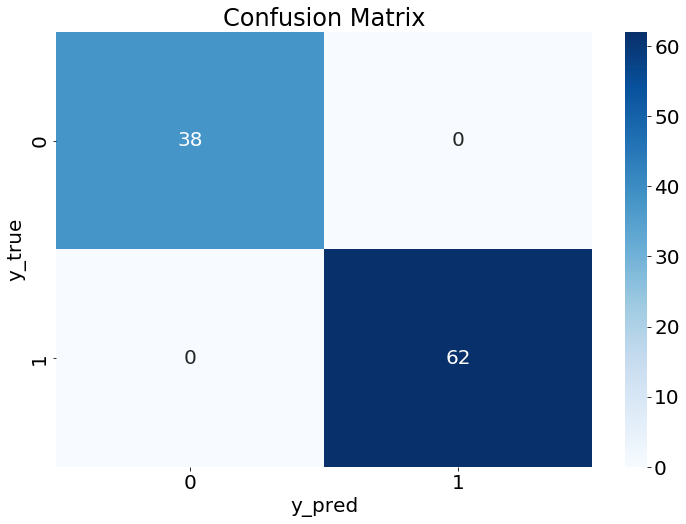

In [54]:
plot_cm(y_test, random_forest_preds)

# 5. Saving a Model for Deployment

In [55]:
joblib.dump(scaler, './model/minmax_ckd.pkl')

['./model/minmax_ckd.pkl']

In [56]:
joblib.dump(random_forest, './model/random_forest_ckd.pkl')

['./model/random_forest_ckd.pkl']

In [57]:
# Loading the saved model for prediction

In [58]:
random_forest_load = joblib.load('./model/random_forest_ckd.pkl')

In [59]:
prediction = random_forest_load.predict(x_test)

In [60]:
prediction== random_forest_preds

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

# 6. Feature Important 

In [61]:
x_features_scaled

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,age_na,bp_na,bgr_na,bu_na,sc_na,sod_na,pot_na,hemo_na,pcv_na,wc_na,rc_na
0,0.522727,0.230769,0.8,0.333333,0.166667,0.0,1.0,0.5,0.5,0.211538,0.088575,0.010582,0.842271,0.042697,0.836735,0.777778,0.231405,0.525424,1.0,1.0,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.056818,0.000000,0.8,0.833333,0.166667,0.0,1.0,0.5,0.5,0.211538,0.042362,0.005291,0.842271,0.042697,0.557823,0.644444,0.157025,0.457627,0.5,0.5,0.5,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.681818,0.230769,0.4,0.500000,0.666667,1.0,1.0,0.5,0.5,0.856838,0.132221,0.018519,0.842271,0.042697,0.442177,0.488889,0.219008,0.457627,0.5,1.0,0.5,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.522727,0.153846,0.2,0.833333,0.166667,1.0,0.5,1.0,0.5,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085,1.0,0.5,0.5,0.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.556818,0.230769,0.4,0.500000,0.166667,1.0,1.0,0.5,0.5,0.179487,0.062901,0.013228,0.842271,0.042697,0.578231,0.577778,0.210744,0.423729,0.5,0.5,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5,0.659091,0.307692,0.6,0.666667,0.166667,0.0,0.0,0.5,0.5,0.111111,0.060334,0.009259,0.867508,0.015730,0.619048,0.666667,0.231405,0.389831,1.0,1.0,0.5,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.750000,0.153846,0.4,0.166667,0.166667,0.0,1.0,0.5,0.5,0.166667,0.134788,0.312169,0.627760,0.033708,0.632653,0.600000,0.239669,0.457627,0.5,0.5,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,0.250000,0.230769,0.6,0.500000,0.833333,1.0,0.5,0.5,0.5,0.829060,0.075738,0.009259,0.842271,0.042697,0.632653,0.777778,0.194215,0.491525,0.5,1.0,0.5,1.0,1.0,0.5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,0.568182,0.384615,0.6,0.666667,0.166667,1.0,0.5,1.0,0.5,0.247863,0.150193,0.019841,0.842271,0.042697,0.523810,0.533333,0.305785,0.322034,1.0,1.0,0.5,1.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,0.579545,0.307692,0.8,0.500000,0.166667,0.5,0.5,1.0,0.5,0.102564,0.270860,0.089947,0.690852,0.026966,0.435374,0.444444,0.409091,0.271186,1.0,1.0,0.5,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
features=x_features_scaled.iloc[:, :24]
features

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.522727,0.230769,0.8,0.333333,0.166667,0.0,1.0,0.5,0.5,0.211538,0.088575,0.010582,0.842271,0.042697,0.836735,0.777778,0.231405,0.525424,1.0,1.0,0.5,1.0,0.5,0.5
1,0.056818,0.000000,0.8,0.833333,0.166667,0.0,1.0,0.5,0.5,0.211538,0.042362,0.005291,0.842271,0.042697,0.557823,0.644444,0.157025,0.457627,0.5,0.5,0.5,1.0,0.5,0.5
2,0.681818,0.230769,0.4,0.500000,0.666667,1.0,1.0,0.5,0.5,0.856838,0.132221,0.018519,0.842271,0.042697,0.442177,0.488889,0.219008,0.457627,0.5,1.0,0.5,0.5,0.5,1.0
3,0.522727,0.153846,0.2,0.833333,0.166667,1.0,0.5,1.0,0.5,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085,1.0,0.5,0.5,0.5,1.0,1.0
4,0.556818,0.230769,0.4,0.500000,0.166667,1.0,1.0,0.5,0.5,0.179487,0.062901,0.013228,0.842271,0.042697,0.578231,0.577778,0.210744,0.423729,0.5,0.5,0.5,1.0,0.5,0.5
5,0.659091,0.307692,0.6,0.666667,0.166667,0.0,0.0,0.5,0.5,0.111111,0.060334,0.009259,0.867508,0.015730,0.619048,0.666667,0.231405,0.389831,1.0,1.0,0.5,1.0,1.0,0.5
6,0.750000,0.153846,0.4,0.166667,0.166667,0.0,1.0,0.5,0.5,0.166667,0.134788,0.312169,0.627760,0.033708,0.632653,0.600000,0.239669,0.457627,0.5,0.5,0.5,1.0,0.5,0.5
7,0.250000,0.230769,0.6,0.500000,0.833333,1.0,0.5,0.5,0.5,0.829060,0.075738,0.009259,0.842271,0.042697,0.632653,0.777778,0.194215,0.491525,0.5,1.0,0.5,1.0,1.0,0.5
8,0.568182,0.384615,0.6,0.666667,0.166667,1.0,0.5,1.0,0.5,0.247863,0.150193,0.019841,0.842271,0.042697,0.523810,0.533333,0.305785,0.322034,1.0,1.0,0.5,1.0,0.5,1.0
9,0.579545,0.307692,0.8,0.500000,0.166667,0.5,0.5,1.0,0.5,0.102564,0.270860,0.089947,0.690852,0.026966,0.435374,0.444444,0.409091,0.271186,1.0,1.0,0.5,0.5,0.5,1.0


In [63]:
response

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
cat_col

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'class']

In [65]:
num_col

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [66]:
df=df.astype('string').fillna('0')

In [67]:

le=LabelEncoder()

In [68]:
for col in cat_col:
  df[col]=le.fit_transform(df[col])

In [69]:
ind_col=[col for col in df.columns if col!='class']
dep_col='class'

In [70]:
features=df[ind_col]
response=df[dep_col]


In [71]:
imp_features=SelectKBest(score_func=chi2,k=20)
imp_features=imp_features.fit(features,response)

In [72]:
imp_features

SelectKBest(k=20, score_func=<function chi2 at 0x0000019E0015CBF8>)

In [73]:
imp_features.scores_

array([  80.88545786,   46.10920121,    2.18785527,  216.        ,
         94.8       ,  122.68463252,   25.21616162,    3.24444444,
          1.17958533, 1462.94004415, 2363.95917267,  360.41328872,
       1926.39291967,   22.68526748,  298.66838931, 1366.98979989,
       1434.15050247, 2594.00205656,   24.88085627,   22.08610592,
          1.93580247,    8.73194733,    7.61950877,    4.97095134])

In [74]:
datascore=pd.DataFrame(imp_features.scores_,columns=['Score'])
dfcols=pd.DataFrame(features.columns)
dfcols

,0
0,age
1,bp
2,sg
3,al
4,su
5,rbc
6,pc
7,pcc
8,ba
9,bgr


In [75]:
features_rank=pd.concat([dfcols,datascore],axis=1)
features_rank.columns=['features','score']
features_rank

,features,score
0,age,80.885458
1,bp,46.109201
2,sg,2.187855
3,al,216.000000
4,su,94.800000
5,rbc,122.684633
6,pc,25.216162
7,pcc,3.244444
8,ba,1.179585
9,bgr,1462.940044


In [76]:
columns=pd.read_csv("input/data_description.txt",sep='-')
columns=columns.reset_index(drop=True)
columns

,cols
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,rred blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [77]:
features_rank.features=columns.cols
features_rank

,features,score
0,age,80.885458
1,blood pressure,46.109201
2,specific gravity,2.187855
3,albumin,216.000000
4,sugar,94.800000
5,rred blood cells,122.684633
6,pus cell,25.216162
7,pus cell clumps,3.244444
8,bacteria,1.179585
9,blood glucose random,1462.940044


In [78]:
imp_features_sorted=features_rank.nlargest(24,'score')
imp_features_sorted.to_csv(r'./model/feature_important_with_score.csv', index=False)

In [79]:
important_feature_names=imp_features_sorted['features']
important_feature_names.to_csv(r'./model/feature_important.csv', index=False)